In [1]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#Load Dataset
studentperf=pd.read_csv('./studentperf.csv')
studentperf.head()

,Method,satis,time,ability,prvperf,Outcome
0,1,5,22,13,26.5,1
1,1,4,12,27,19.6,0
2,1,2,22,18,26.4,1
3,1,5,20,18,25.1,0
4,1,4,22,29,28.0,1


In [3]:
#Key Statistics
studentperf.describe()

,Method,satis,time,ability,prvperf,Outcome
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2.000000,4.966667,18.533333,29.216667,22.796667,0.450000
std,0.823387,1.813010,3.586541,11.295854,3.262367,0.501692
min,1.000000,1.000000,12.000000,7.000000,16.000000,0.000000
25%,1.000000,4.000000,16.000000,22.000000,20.375000,0.000000
50%,2.000000,5.000000,18.000000,29.500000,22.700000,0.000000
75%,3.000000,6.000000,22.000000,37.250000,25.225000,1.000000
max,3.000000,9.000000,26.000000,49.000000,32.800000,1.000000


<Axes: >

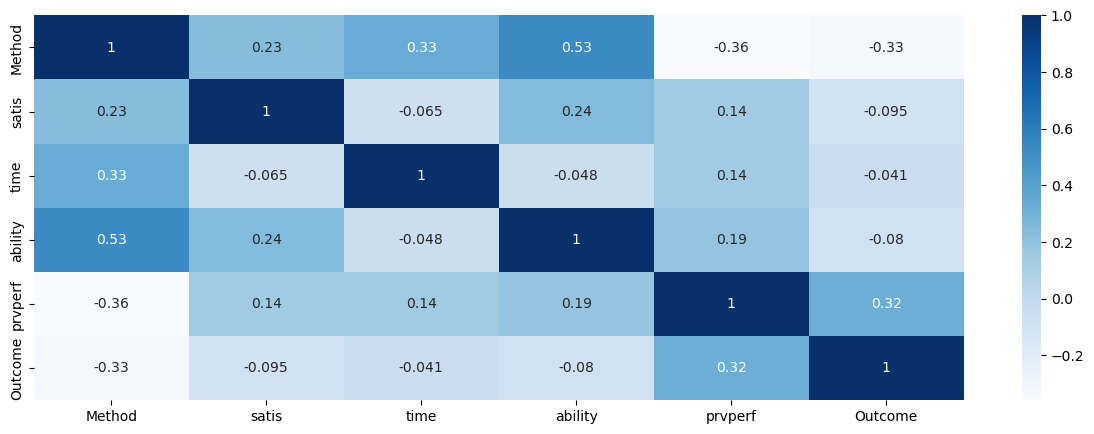

In [4]:


#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(studentperf.corr(),annot=True,cmap="Blues")



C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\AppData\Local\Temp\ipykernel_3900\1242048277.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


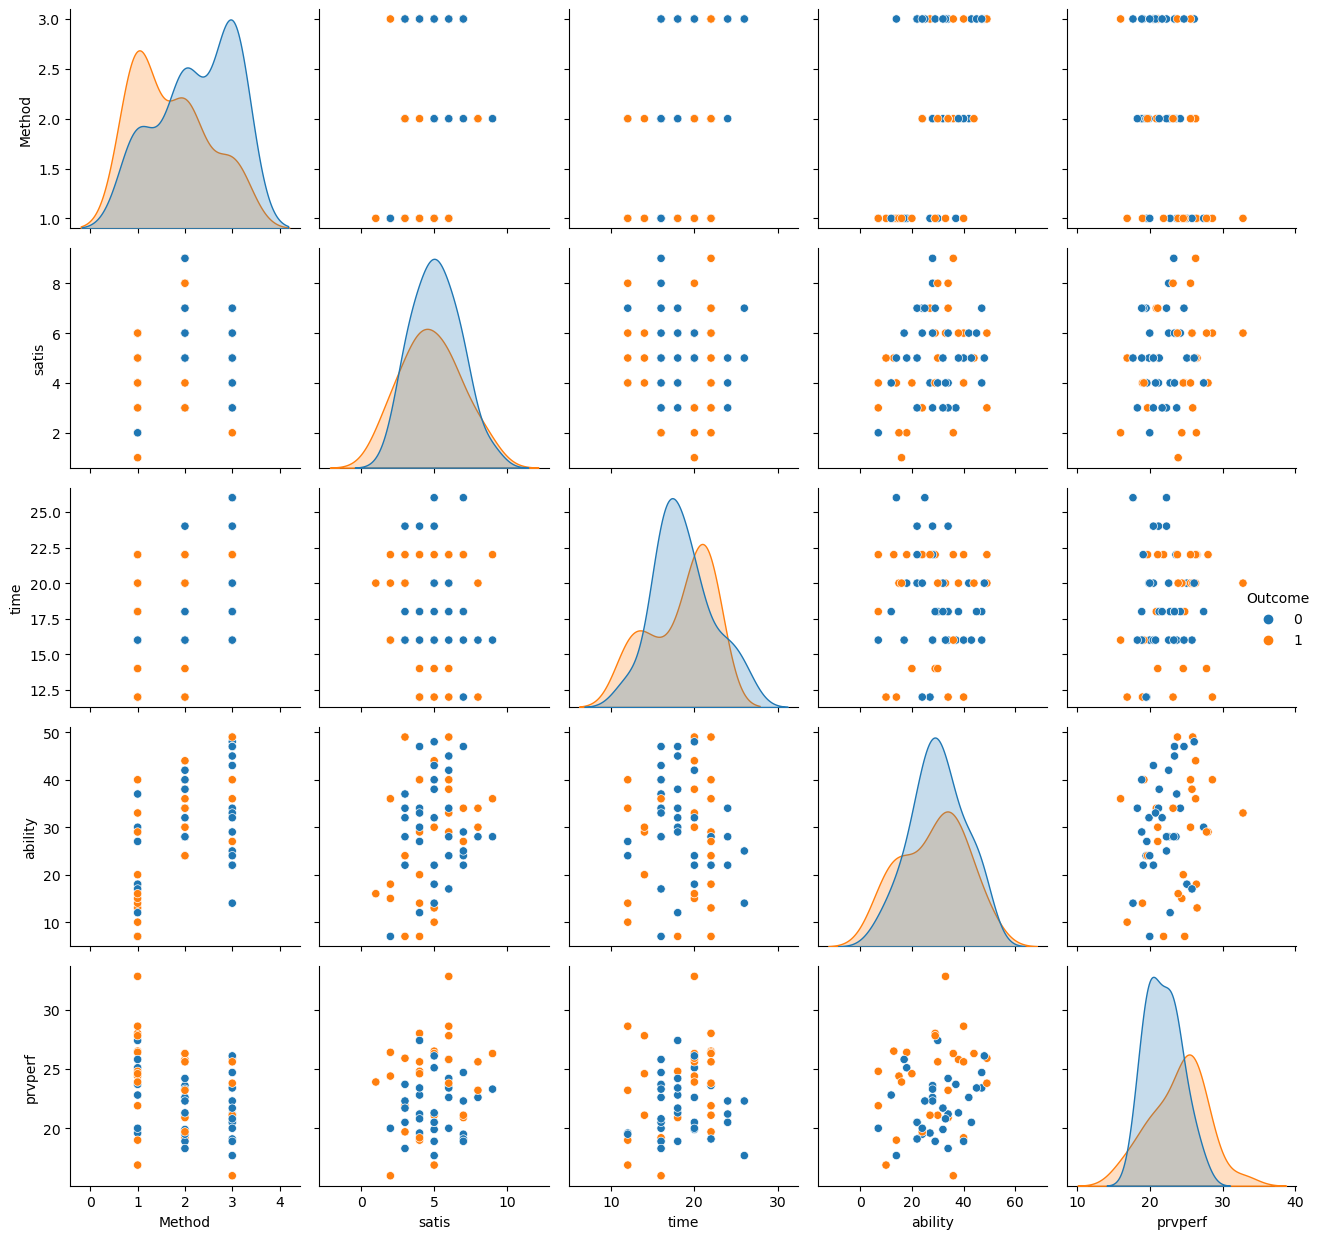

In [9]:
# Pairplot with hue=species
sns.pairplot(studentperf, hue='Outcome')
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd

In [10]:
# Load the dataset
studentperf = pd.read_csv("studentperf.csv")

In [11]:
# Create x and y variables
x = studentperf.drop('Outcome', axis=1).to_numpy()
y = studentperf['Outcome'].to_numpy()

In [12]:
#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.2,random_state=100)

In [13]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [14]:
#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['1','0']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))      


Estimator: SVM
[[5 2]
 [2 3]]
              precision    recall  f1-score   support

           1       0.71      0.71      0.71         7
           0       0.60      0.60      0.60         5

    accuracy                           0.67        12
   macro avg       0.66      0.66      0.66        12
weighted avg       0.67      0.67      0.67        12


Estimator: Naive Bayes
[[5 2]
 [3 2]]
              precision    recall  f1-score   support

           1       0.62      0.71      0.67         7
           0       0.50      0.40      0.44         5

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.57      0.58      0.57        12

